

Individual subplots normalized along the y-axis; best to explicitly note this in your figure legend, see Rule #7 of Rougier et al., 2014 https://doi.org/10.1371/journal.pcbi.1003833 .


Plot image saved to: test_panel_bar_plot.png


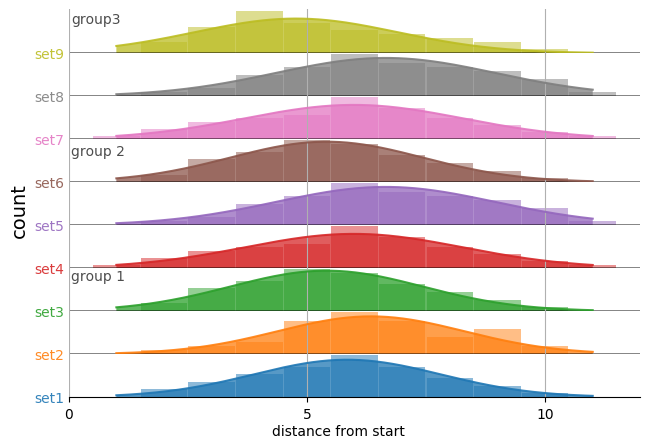

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


# plot_panel_bar_plots_with_fit.py by Wayne Decatur
__author__ = "Wayne Decatur" #fomightez on GitHub
__version__ = "0.0.1"
__license__ = "MIT"

# ****WORKS "AS-IS" FOR PASTING INTO A JUPYTER NOTEBOOK CELL.****
# (Uncomment the last line, i.e., `plt.show()` for plot to show up in the notebook.)

#*******************************************************************************
# USES Python 2.7 but should be convertable via 2to3, see https://docs.python.org/3.0/library/2to3.html
#
# PURPOSE:  my 'hacky' casting of the histogram-generating (actually kernel 
# density estimate curve plot-generating) code of 
# [joypy](https://github.com/sbebo/joypy) as a less automated, 
# fully-customizable plotter of panels of bar graphs with curves fit to the data. 
# Later I rezlized it is also vaguel similar to a horizontal violin plot that
# featured 'stacks' but where one-sided and set up so can compare more than one.
# Originally written to be part of a mini-pipeline, 
# `shepherds_read_starts_at_start_of_origins_thru_to_plotting.py`, where I plot 
# read starts at the start of origin promoters mined by 
# `plot_coverage_and_starts.py` and exported using the `--export_data` options.
# Stylistically, it seems others have called this a 'panel of bar charts', see
# http://support.sas.com/documentation/cdl/en/grstatproc/62603/HTML/default/viewer.htm#a003241944.htm
# ,and so my description/name is an effort to acknowledge that.
# 
# Presently, the data is hard-coded in the script but the script is written as
# a main function that can be imported to other scripts obivating the 
# hard-coded data.
# ****WORKS "AS-IS" FOR PASTING INTO A JUPYTER NOTEBOOK CELL.****
# (Uncomment the last line, i.e., `plt.show()` for plot to show up in the notebook.)
#
#
#
#
# Dependencies beyond the mostly standard libraries/modules:
# scipy, depending on choice of fit
# statsmodel, depending on choice of fit
#
#
#
# VERSION HISTORY:
# v.0.1. basic working version
#
#
# 
#
# TO RUN:
# Example,
# Enter on the command line of your terminal, the line
#-----------------------------------
# python plot_panel_bar_plots_with_fit.py
#-----------------------------------
#
#
#*******************************************************************************
#


#*******************************************************************************
##################################
#  USER ADJUSTABLE VALUES        #

##################################
#

output_file_name = "test_panel_bar_plot.png"

# bar plot data components
# Each entry for a subplot is to be two lists of equal length, one for the x 
# values  and one for the y values. (Probably fine as tuples, instead of lists,
# as well??) Example code that could be use for a single subplot is commented 
# out on the next three lines:
#x_set1 = [0,1,2,3,4,5,6]
#y_set1 = [0.1,1.1,4.5,8.3,2.5,0.9]
#subplot_data_set1 = [x_set1, y_set1]
# Then follow that example for the others.
subplot_data_set1 = [list(range(1, 12)),[0, 2, 4, 6, 8, 11,8, 5, 3, 1, 0]]
subplot_data_set2 = [list(range(1, 12)),[0, 1, 2, 3, 8, 10,8, 4, 6, 2, 0]] # more like real count data; note that last value cannot be greater than 15 or get error about `maxfev = 800`
subplot_data_set3 = [list(range(1, 12)),[0, 2, 6, 8, 11, 10,7, 5, 3, 1, 0]]
subplot_data_set4 = [list(range(1, 12)),[1, 3, 5, 6, 7, 12,9, 6, 4, 2, 1]]
subplot_data_set5 = [list(range(1, 12)),[0, 1, 2, 5, 7, 10,8, 7, 6, 4, 1]]
subplot_data_set6 = [list(range(1, 12)),[0, 2, 6, 8, 11, 10,7, 5, 3, 1, 0]]
subplot_data_set7 = [list(range(1, 12)),[1, 3, 5, 6, 7, 12,9, 6, 4, 2, 1]]
subplot_data_set8 = [list(range(1, 12)),[0, 1, 2, 5, 7, 10,8, 7, 6, 4, 1]]
subplot_data_set9 = [list(range(1, 12)),[0, 3, 7, 11, 8, 6,5, 4, 3, 1, 0]]

# Now put all the subplot data in a master DATA list.
# This MASTER DATA list will simply a list of the lists associated with each 
# subplot. (I suspect again tuples of the subplot data would work too?)
# One could definitely do what is found on the next line as an 
# approach to make this master `data` list building on the code from above:
data = [subplot_data_set1,subplot_data_set2,subplot_data_set3,subplot_data_set4,subplot_data_set5,subplot_data_set6]
# And that approach may be fine for handling your data. I.E., MOST USERS CAN 
# MAKE THEIR COMBINED `data` AND SKIP THE DISCUSSION AND THE CODE ON THE NEXT 
# FEW LINES.
# However, since that won't be easily expanded beyond that scale, I am going to
# do this differently with some more advanced Python code so I can adjust later 
# easily if needed for testing the abilities/features of this script....
data = []
# For the approach on the next few lines, seeMartijn Pieters. answer at https://stackoverflow.com/questions/15161657/iteration-over-variable-names-in-python
g = globals() 
for i in range(1,10):
    varname = 'subplot_data_set{}'.format(i)
    data.append(g[varname])
    # print (i, g[varname])
# EITHER WAY, AT THIS POINT THERE SHOULD BE AN OVERARCHING `data` OBJECT.



my_data_labels = ['set1','set2','set3','set4','set5','set6','set7','set8','set9']# a list of text
# specifying labels for each subplot. If the list of labels is smaller than the
# data list, it will be cycled to label subsequent subplots, and this can be
# useful for easily labeling repetitive grouped data. For example, if you have 
# nine subplots from a series of three experimetnal replicates, you just have 
# to list the three labels once and then they will be applied like so, label 1
# to subplot 1, label 2 to subplot 2, label 3 to subplot 3, label 1 to 
# subplot 4, etc..

shared_x_label = 'distance from start' # string for overarching x-axis label
shared_y_label = 'count' # string for overarching y-axis label

title = None # you can set a string to be the overarching title of the entire plot

first_set_of_data_at_bottom = True # set this true if you want the FIRST subset
# of data with appropriate information at the bottom of the plot. By default,
# or with this setting false, the first provided data with be put at the top of 
# the plot.

# for default colors use RGBAs, as worked out in 
# `developing_joyplot_for_counts_distr_rel_ends.ipynb`, because ultimately may
# want to control alpha for facecolor and edgcolor of bars separately.
# Basing default on `CN` colors, see top of https://matplotlib.org/users/colors.html .
# Got RGB values using `mcolors.to_rgba()`, see 
# `developing_joyplot_for_counts_distr_rel_ends.ipynb` and `Color help` in 
# `Trying to work out plotting distribution of ends relative to promoter.md`
C0_thru_C9_converted_to_RGBA = [
                                (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
                                (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
                                (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
                                (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
                                (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
                                (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
                                (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
                                (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
                                (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
                                (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
                                ]


my_label_and_bar_colors = [
                                (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.9),
                                (1.0, 0.4980392156862745, 0.054901960784313725, 0.9),
                                (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 0.9),
                                (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 0.9),
                                (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 0.9),
                                (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 0.9),
                                (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 0.9),
                                (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 0.9),
                                (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 0.9),
                                (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 0.9),
                                ] # If the list of colors is smaller than the
# data list, it will be cycled, and this means don't have to list each instance 
# for labeling repeated, grouped data.

my_bar_alphas = [0.5,0.5,0.5,0.5,0.5,0.5] #If the list of alphas is smaller than
# the data list, it will be cycled, and this means don't have to list each  
# instance for labeling repeated, grouped data. It also means that you can 
# supply a single value 0.0 transparent through 1.0 opaque and control the alpha
# channel setting for all bars in all subplots ON TOP of the setting in each
# color, meaning it can never be more opaque than what the alpha channel setting
# for `my_label_and_bar_colors` allows. But this can be used to make them more
# transparent than the setting `my_label_and_bar_colors`.

my_label_alphas = [0.9,0.9,0.9,0.9,0.9,0.9]#If the list of colors is smaller than
# the data list, it will be cycled, and this means don't have to list each  
# instance for labeling repeated, grouped data.

lines_around_bars = False # Some plots look better with lines around the bars. 
# Set this to true to place a dark line on the outer edge of the bars of the bar
# plot.

group_label_subplots = [3,6,9] # list of numbers indicating for which subplots to 
# place labels for grouped subsets. Enter these as normal values, for instance 
#`1` for the first subplot and `3` for the third, etc.. The order of the list
# does not really matter as long as the corresponding text to be used for the
# subplot is in the same order in `group_label_subplots_str`.

group_label_subplots_str = ["group 1","group 2", "group3"] #the text for the group labels
# specified by `group_label_subplots`. This needs to have the same 
# number of elements as `group_label_subplots` and match the order provided in
# `group_label_subplots`.

group_label_color_list =  [(0.3,0.3,0.3,1.0)] # list of colors to label groups. If the list of
# colors is smaller than the `group_label_subplots`list, it will be cycled to
# make it easy to set colors. Some other variables for the group_label settings
# were specifically chosen to not cycle to keep the 1:1 correspondence with the 
# idea it will be easier for the user to follow.

group_label_y_posns = [8.0,7.0,8.0] #list of coordinate numbers for postioning
# in the y dimension text for group labels; list gets cycled if not at least  
# same size as `group_label_subplots`. Had to be added as a list and not a  
# single value because with real data I was seeing some group labels a little 
# different relative the x-axis, probably due to the x-axes being slightly 
# different.


bar_width = 1/1.317
bar_width = 1/1.023

curve_fit_or_smoother = "gd"  # options so far are 'gd' for 'Gaussian 
# distribution', 'ma' for 'moving average', 'sgf' for 'Savitzky Golay Filtering', 
# 'lowess', or 'kr' for 'kernel regression'. Or `None`, without quotes

#
#*******************************************************************************
#**********************END USER ADJUSTABLE VARIABLES****************************































#*******************************************************************************
#*******************************************************************************
###DO NOT EDIT BELOW HERE - ENTER VALUES ABOVE###

import sys
import os
import argparse
import logging
import numpy as np
# USE NEXT TWO LINES IF NOT USING PYTHONANYWHERE, for when using a Jupyter notebooks, for example
import matplotlib
from matplotlib import pyplot as plt
'''# USE NEXT THREE LINES WHEN RUNNING ON PYTHONANYWHERE
import matplotlib # in order to use `matplotlib.use('Agg')`, need this first, see source of next line
matplotlib.use('Agg') # Force matplotlib to not use any Xwindows backend for running on PythonAnywhere. # from https://stackoverflow.com/questions/2801882/generating-a-png-with-matplotlib-when-display-is-undefined after searched error I was getting after upgrading matplolib in my Pythonanywhere account
import matplotlib.pyplot as plt'''






#DEBUG CONTROL
#comment line below to turn off debug print statements
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

###---------------------------HELPER FUNCTIONS---------------------------------###


def generate_output_file_name(file_name, suffix):
    '''
    Takes a file name as an argument and returns string for the name of the
    output file. The generated name is based on the original file
    name.

    It also notes in name specific chromsomes or scaffolds if plotting was 
    limited to those.

    Specific example
    ================
    Calling function with
        ("data1.txt", "_plot.png")
    returns
        "data1_plot.png"
    '''
    main_part_of_name, file_extension = os.path.splitext(
        file_name) #from http://stackoverflow.com/questions/541390/extracting-extension-from-filename-in-python
    return main_part_of_name + suffix




def list2text(a_list):
    '''
    a function that takes a lists and makes a string where each item in list
    is on a new line
    '''
    return "\n".join(a_list)










###--------------------------END OF HELPER FUNCTIONS---------------------------###
###--------------------------END OF HELPER FUNCTIONS---------------------------###














#*******************************************************************************
###-----------------for parsing command line arguments-----------------------###
parser = argparse.ArgumentParser(prog='plot_panel_bar_plots_with_fit.py',
    description="plot_panel_bar_plots_with_fit.py for plotting data.        \
    Presently, the data is hard-coded in but this is written as a main function\
    that can be imported to other scripts obivating the hard-coded data.\
    **** Script by Wayne Decatur   \
    (fomightez @ github) ***")

#parser.add_argument("tsv_file", help="Name of file containing the tab-separated data from the command `samtools depth -a -r <chrom><start>-<end> INPUT.bam > output.coverage`. REQUIRED.", type=argparse.FileType('r'), metavar="COVERAGE")
#parser.add_argument("-rev", "--reverse_orientation", help="Plot left to right to correspond to 5'-> 3' direction on reverse strand.",action="store_true")
'''
parser.add_argument('-lim', '--limit', action='store', type=int, metavar="INT",
    help="**FOR ADVANCED USE.*** Allows for controlling the upper end of scale \
    for y-axis. Should only be needed when extremes of values in one plot might\
    not match a plot for a related but different sample. Put the upper limit\
    integer after the flag, such as `--limit 82`.") '''
# parser.add_argument("-exp_d", "--export_data", help="Export the data as CSV printed to the console as stdout; use a redirect in a shell command to send the output to a file. If the `--reverse_orientation` option is utilized when the script is called then the data is exported as of the complementary strand 5'-end is the starting point. This is a utility feature added to enable easily passing the data mined by this script onto related scripts. This overrides the plotting action, i.e, in this mode no plot will be made, despite the name of the script.",action="store_true")

'''
#I would also like trigger help to display if no arguments provided because need at least one input file
if len(sys.argv)==1:    #from http://stackoverflow.com/questions/4042452/display-help-message-with-python-argparse-when-script-is-called-without-any-argu
    parser.print_help()
    sys.exit(1)
args = parser.parse_args()
tsv_file = args.tsv_file
reverse_orientation = args.reverse_orientation
limit = args.limit
export_data = args.export_data
'''










###-----------------Actual Main portion of script---------------------------###


def plot_data(data,
             labels=None, 
             colors = None,
             bar_alphas=None,
             label_alphas=None,
             shared_x_label = None,
             shared_y_label = None,
             title=None,
             bar_width=1/1.023,
             group_label_subplots=None,
             group_label_subplots_str = None,
             padding_in_height_dim = -0.68,
             x_upper_val = None,
             x_lower_val = None,
             y_upper_val = None,
             y_lower_val = None,
             figsize=None,
             group_label_color_list = [0.3,0.3,0.3,1.0],
             group_label_y_posns = [8.0],
             group_label_fontsize=10,
             curve_fit_or_smoother = 'gd',
             show_yaxis_scales_right = False,
             show_yaxis_scales_left = False,
             plot_style = 'default',
             **kwargs):
    '''
    Draw panel of vertically stacked bar plots with curve fits from an 
    appropriately nested collection of lists using matplotlib.

    Parameters
    ----------
    data : list
        List of data with lists of x & y values, in that order, as list elements.
    labels : list
        List of text for labeling each subplot; list gets cycled if not at  
        least same size as data list.
    colors : list
        List of colors as RGBA for each subplot; list gets cycled if not at  
        least same size as data list.
    bar_alphas : list
        value specifying alpha channel setting for bars of bar plot, 
            0.0 transparent through 1.0 opaque.
    label_alphas : list
    shared_x_label : string
        Text to be the label for x-axis of ENTIRE plot.
    shared_y_label : string
        Text to be the label for y-axis of ENTIRE plot.
    title : string
        Text to be the main title of ENTIRE plot.
    padding_in_height_dim : number
        A size number to adjust the padding between subplots by. Increasing in
        negative direction brings them closer together and can start to overlap.
    x_upper_val : number
        By default, the script will handle this but it can also be set by 
        entering a value as a number here to set the highest value of 
        shared x-axis.
    x_lower_val : number
        By default, the script will handle this but it can also be set by 
        entering a value as a number here to set the lowest value of 
        shared x-axis.
    y_upper_val : number
        By default, the script will handle this but it can also be set by 
        entering a value as a number here to set the upper value of each
        y_axis. If set `y_upper_val`, need to set `y_lower_val`.
    y_lower_val : number
        By default, the script will handle this but it can also be set by 
        entering a value as a number here to set the lower value of each
        y_axis. If set `y_lower_val`, need to set `y_upper_val`.
    figsize : tuple
        The size of the figure to create in inches by default. `figsize=(13,13)`
        for example would be 13 x 13 image. Alternatively, or on a related note,
        control DPI in output file with `plt.savefig()` later.
    group_label_color_list : list of tuples
        A list of colors to use for group labels; list gets cycled if not at  
        least same size as `group_label_subplots`.
    group_label_y_posns : list of float
        A list of coordinate values for y-dimension of text for group labels; 
        list gets cycled if not at least same size as 
        `group_label_subplots`. Had to be added as a list and not a single value
        because with real data I was seeing some group labels a little different
        relative the x-axis, probably due to the x-axes being slightly different.
    group_label_fontsize : number
        Group label font size.
    curve_fit_or_smoother : string or `None`, without quotes
        Designate fit or smoothing function. Options so far are 'gd' for 
        'Gaussian distribution', 'ma' for 'moving average', 'sgf' for 'Savitzky
        Golay Filtering','lowess', or 'kr' for 'kernel regression'. Or `None`, 
        without quotes
    show_yaxis_scales_right : Boolean
    Show  UNPERFECTED scale / gradations / tickmarks and labels on the y-axes on right side.
    show_yaxis_scales_left : Boolean
    Show UNPERFECTED scale / gradations / tickmarks and labels on the y-axes on right side. If true, it renders moot `show_yaxis_scales_right` setting.
    kwarg : other plotting keyword arguments
        To be passed to plot function (USING THIS?!?!?)
    '''
    # First some preliminary and or optional adjusting of the data...

    # Some checks of the user-provided data.
    # Check there is an x & y values list for each supposed plot list 
    # This could be done en masse simply with 
    # `assert all(len(each_set) == 2 for each_set in data),`, but I am going to do 
    # differently because finding one set of subplot data from among many may be 
    # annoying and the check done here can be structured to offer more feedback to
    # mitigate this pain.
    # Plus...
    # Check that each set of coupled x & y values are indeed of equal length. 
    # Matplotlib checks this itself actually, but the error message it produces is, 
    # `ValueError: shape mismatch: objects cannot be broadcast to a single shape`,
    # and isn't overly transparent after you entered a lot of lists of data. I could
    # have used 
    # `assert all(len(each_set[0]) == len(each_set[1]) for each_set in data)` to 
    # check all at once, but I am going to do differently because finding one 
    # problematic list that is among a lot of lists could be annoying and the check 
    # done here can be structured to offer more feedback to mitigate this pain.
    for each_set in data:
        assert len(each_set) == 2, "***There is NOT a coupled list of `x` and `y` values in the data that looks like `" + str(each_set)+"`.***  SUGGESTED REMEDY: Have two lists for each set of data for each subplot."
        assert len(each_set[0]) == len(each_set[1]), "***There is a mismatch in the number of items in a list of `x` and `y` values for `"+ str(each_set)+"`.***  SUGGESTED REMEDY: Check data lists and/or adjust or switch to using joypy's histograms that bins data automatically."

    assert len(group_label_subplots) == len(group_label_subplots_str), "***There is a discrepancy in the number of subplots specified to receive group labels (group_label_subplots) and the number of supplied strings to use as text labels for `group_label_subplots_str`."



    # fix the group label subplot numbers to match zero-indexing in Python
    group_label_subplots = [(v-1) for v in group_label_subplots]

    
    # Reversing lists if first set of data to be at bottom... (overly detailed so it
    # is clear what worked and what did not)
    # If user wants first set of data listed in the provided `data` at bottom of
    # plot with the next set going up form that, reverse ALL ASSOCIATED lists.
    # This is because the subplots are a 'LIFO' queue that is turned over so that 
    # the stack rises along the y-axis as it is filled, sort of like the battery
    # chamber on a typical hand-held flashlight (better metaphor around?).
    # To do that I was originally using this block of code:
    '''
    if first_set_of_data_at_bottom:
        associated_lists = [data, labels, colors, bar_alphas,label_alphas, group_label_color_list]
        for each_list in associated_lists:
            each_list.reverse()
            '''
    #However, in my test case, my data list was shorter than the colors list, and I
    # noticed the data plots were then getting associated with different colors, 
    # which isn't necessarily a problem, except the best colors are the early ones 
    # and they were getting left off since now the plotted data were getting paired
    # with the colors higher in the list in a manner similar to this simplified
    # illustration:
    # Originally `data1,data2,data3` were paired with `color1,color2,color3` of the
    # color list `[color1,color2,color3,color4,color5,color6]`, but if simply
    # reverse each list, the data`data3,data2,data1`, in that order, now get paired
    #  with colors `color6,color5,color4` and the first colors go unused.
    # The trick is to subset each list first on the length of the data and then 
    # reverse. If this is done with slice notation, there is no need to check ahead
    # if a list is long enough to need subsetting because no error is thrown if 
    # there is an attempt to subset with a size longer than the list itself, just
    # still get whole list, see 
    # https://stackoverflow.com/questions/9490058/why-substring-slicing-index-out-of-range-works-in-python
    # So this works...
    if first_set_of_data_at_bottom:
        def subset_n_reverse(list_o_lists, cutoff):
            '''
            Takes a list of lists and subsets each according to a cutoff value (integer)
            and returns the REVERSE version of that subsetted list.
            Seems a bit of a round-about way, but...
            Doing it this way because using list method `alist.reverse()`
            reverses a list in place but doesn't return anything. Therefore, cannot
            simply do `alist[0:3].reverse()`.
            About that see https://stackoverflow.com/questions/4647368/how-do-i-reverse-a-part-slice-of-a-list-in-python ,
            where somebody asked about what I found where `alist[0:3].reverse()` gave `None`.
            In theory, I think I could slice and reverse in one slice command but the large 
            negative numbers involved don't make intuitive sense to me (or others, see 
            https://stackoverflow.com/questions/18781204/reversing-list-using-slicing-0-1-in-python 
            and 
            https://stackoverflow.com/questions/15627312/what-value-do-i-use-in-a-slicing-range-to-include-the-last-value-in-a-numpy-arra)
            and so it just seemed easier to do in two steps where second is 
            equivalent to `alist[::-1]` after subset. Originally I even had as two lines
            with subset first and then the reversal but then realized according to 
            Reman's answer at https://stackoverflow.com/questions/4647368/how-do-i-reverse-a-part-slice-of-a-list-in-python
            could combine in a way that it still somewhat clearer than the large 
            negatives make it.
            '''
            lists_to_return = []
            for each_list in list_o_lists:
                # assign subset to a variable
                lists_to_return.append(each_list[0:cutoff][::-1])
            return lists_to_return
            
        associated_lists = [data, labels, colors, bar_alphas,label_alphas, group_label_color_list, group_label_y_posns]
        data, labels, colors, bar_alphas,label_alphas, group_label_color_list, group_label_y_posns = subset_n_reverse(associated_lists,len(data))
        # in addition to reversing the necessary lists, make the group label indices match switch
        group_label_subplots = [((len(data)- 1) - v) for v in group_label_subplots]








    # Now to really begin preparing for plotting...
    plt.close('all')
    plt.style.use(plot_style)
    #fig, ax = plt.subplots(nrows=(len(data)), ncols=1)
    fig, _axes = plt.subplots(nrows=(len(data)), ncols=1, figsize=figsize) #be aware `figsize` use best avoided in Jupyter ecosystem. Seems to get applied all subsequent jupyter notebook cells and notebooks; only way to reset is restart kernel
    #fig, ax = plt.subplots(nrows=(len(data)), ncols=1, figsize=(3.6, 3)) #be aware `figsize` use best avoided in Jupyter ecosystem. Seems to get applied all subsequent jupyter notebook cells and notebooks; only way to reset is restart kernel

    # handle labels as a cycling generator because allows easy handling if a 
    # grouped series involved. (and useful for scaling up in debugging easily).
    # Had been handling as `label[i]`.
    import itertools
    dispense_label = itertools.cycle(labels)
    # cycle('ABCD') --> A B C D A B C D A B C D ...
    #similar for colors and alphas
    dispense_label_n_bar_color = itertools.cycle(colors)
    dispense_label_alpha = itertools.cycle(label_alphas)
    dispense_bar_alpha = itertools.cycle(bar_alphas)
    dispense_group_label_color = itertools.cycle(group_label_color_list)
    dispense_group_label_y_pos = itertools.cycle(group_label_y_posns)


    # Handle upper and lower limits of axes...
    # ALL the x-axes need to share the same range that they cover so that the 
    # grid is consistent and the labels at the bottom reflect each subplot.
    # If the user has not provided values for x-axis, try to handle this.
    if not x_upper_val:
        x_upper_val = max([max(xy[0]) for xy in data]) + 1
    if not x_lower_val:
        if (max([max(xy[0]) for xy in data]) ) < 100:
            x_lower_val= 0
        else:
            x_lower_val = (min([xy[0] for xy in data])) - 1






    def bar_subplot(ax,
                    i,
                    x_list, 
                    y_list, 
                    color, 
                    x_upper_val,
                    x_lower_val,
                    y_upper_val = None,
                    y_lower_val = None,
                    bar_alpha=0.8,
                    fontsize=12,
                    ):
        '''
        make the bar plot subplot

        Parameters
        ----------
        ax : matplotlib axes object
            current axes to act on.
        i : integer
            index of current iteration of data being processed.
        x_list : list
            List x-axis data.
        y_list : list
            List y-axis data.
        color : matplotlib color specifier
        bar_alpha : float
            value specifying alpha channel setting for bars of bar plot, 
            0.0 transparent through 1.0 opaque.
        x_upper_val : number
            value as a number for the highest value of shared x-axis. Script will
            pass a value in that attempts to make sense if user doesn't provide.
        x_lower_val : number
            value as a number for the lowest value of shared x-axis. Script will
            pass a value in that attempts to make sense if user doesn't provide.
        y_upper_val : number
            By default, matplotlib will handle this but this provides a means to 
            pass a value as a number to set the upper value of each y_axis.
            If set `y_upper_val`, need to set `y_lower_val`.
        y_lower_val : number
            By default, matplotlib will handle this but this provides a means to 
            pass a value as a number to set the lower value of each y_axis.
            If set `y_lower_val`, need to set `y_upper_val`.
        kwarg : other plotting keyword arguments
            To be passed to plot function (USING THIS?!?!?)
        '''
        r,g,b,a = color
        color_adj_alpha = (r,g,b,bar_alpha) #adds alpha for bars separate from 
        # overall RGBA setting for that color.
        bars_with_edgecolor = lines_around_bars # makes easy to test if looks good to have 
        # lines areound edges of bars in bar plot. Two variable names for this 
        # because I didn't think `bars_with_edgecolor` good variable name to 
        # include in user-settings since trying to make option whether to have
        # lines or not, and not focus on color of them.
        edge_color_RGBA = (0.1,0.1,0.1,0.4) #Change to adjust color of outlines.
        if bars_with_edgecolor:
            ax.bar(x_list, y_list, bar_width, color=color_adj_alpha, edgecolor = [edge_color_RGBA] * len(data[i][0])) # for version of matplotlib I have right now in a binder, `edgecolor` needed to be a list when defined here in bar command and not applied later to bars, see `developing_joyplot_for_counts_distr_rel_ends.ipynb`
        else:
            ax.bar(x_list, y_list, bar_width, color=color_adj_alpha)
        ax.locator_params(nbins=3) # found this helped make mine look like joypy's histograms by limiting the vertical gridlines coming from x-axis. (May limit both but I don't much info on y-axis yet since test data small set?) See page marked as out-dated https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.locator_params.html and https://stackoverflow.com/questions/8533261/python-and-plot-how-to-limit-the-number-of-x-axis-ticks-labels.
        ax.set_xlabel('', fontsize=fontsize)
        ax.set_ylabel('', fontsize=fontsize)
        ax.set_title('', fontsize=fontsize)
        #ax.patch.set_facecolor("None") # removes background color but leaves grid lines
        ax.patch.set_alpha(0.0) # https://stackoverflow.com/questions/4581504/how-to-set-opacity-of-background-colour-of-graph-wit-matplotlib
        # "To make a patch completely transparent, we can either set the alpha to 0, or set the facecolor to 'none' (as a string, not the object None!)"
        ax.grid(b="off", axis='both')
        ax.spines["top"].set_visible(False) # based on https://stackoverflow.com/questions/22016965/removing-frame-while-keeping-axes-in-pyplot-subplots
        ax.xaxis.grid(True)
        # need the limit for x-axis to be same so that grid will be consistent through all subplots
        ax.set_xlim(x_lower_val, x_upper_val)
        if y_upper_val or y_lower_val:
            ax.set_ylim(y_lower_val, y_upper_val)



    # Plot each subplot
    for i,current_axes in enumerate(_axes):
        # get next settings that will be needed to pass onto `bar_subplot` PLUS 
        # used in code in this function.
        the_color=next(dispense_label_n_bar_color)

        bar_subplot(current_axes,i,data[i][0], 
            data[i][1], the_color, 
            x_upper_val, 
            x_lower_val,
            y_upper_val, 
            y_lower_val,
            bar_alpha = next(dispense_bar_alpha)
            ) 
        current_axes.yaxis.set_ticklabels([]) # from Saullo Castro's answer at 
        # https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots because I wanted the y-axis label so I couldn't use `ax1.yaxis.set_visible(False)`
        current_axes.set_yticks([]) # turn off y-axis gridlines, which some at matplotlib must call `tickmarks` even though I would prefer the outer ones be called ticks
        current_axes.set_yticks([0])
        current_axes.set_yticklabels([next(dispense_label)], color=the_color, 
                                     alpha=next(dispense_label_alpha)) # `[my_data_labels[i]]` based on code from `joypy` script. It must be some nuanced way to tell matplotlib to use whole string in the list because if just use specific references like I am using for color setitng, it just uses first letter.
        current_axes.spines["left"].set_visible(False)
        current_axes.spines["right"].set_visible(False)
        
        '''
        # Next two lines (that aren't prints or commented out) part of solution to coloring the bar plot after-made based on CT Zhu's answer at https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python
        children_lst=current_axes.get_children()
        #print (children_lst)
        #print(isinstance(children_lst[0], matplotlib.patches.Rectangle))
        current_barlist= [x for x in children_lst if isinstance(x, matplotlib.patches.Rectangle)] # I preferred this because I understand list comprehensions easier but making generator from `filter` works too (and was way from where this was adapted) UNLESS YOU NEED TO CHECK IF MATCHES LAST ITEM!!!
        '''

        
        # Use the next to lines if want X-axis ALL exactly equal thickness and opacity, but to me at the example in cell 7 at 
        # https://github.com/sbebo/joypy/blob/master/Joyplot.ipynb , looks like bottom one is a little darker and thus apply
        # `current_axes.axhline(linewidth=1.1, color="k", alpha= 0.61)` to only the top plots and leave bottom as default.
        # Note could also just apply a darker or less alpha'd, fine-tuned axhline in conjunction with `current_axes.spines["bottom"].set_visible(False)` on all.
        #current_axes.spines["bottom"].set_visible(False) #turn off x-axis horizontal line
        #current_axes.axhline(linewidth=1.1, color="k", alpha= 0.61) # based on doug's answer at https://stackoverflow.com/questions/2553521/setting-axes-linewidth-without-changing-the-rcparams-global-dict
        
        '''
        # for coloring bars using `current_barlist` approach, see above
        for b in current_barlist:
            if b == current_barlist [-1]:
                continue # when on last item in list don't alter it ;`pass` probably would work here too?
            else:
                #print (b)
                b.set_facecolor(my_label_and_bar_colors[i])
                b.set_alpha(alpha=my_bar_alphas[i]) # CANNOT USE IF WANT ALPHA ON FACECOLOR AND EDGECOLOR DIFFERENT. USE RGBA for FACECOLOR & EDGECOLOR setting individually if need independent.
                b.set_edgecolor((0.0,0.0,0.1,0.55))
        '''

        if i < (len(data)-1):
            #ax1.xaxis.set_visible(True) # `False` setting turns off x-axis grid lines, ticks, and tick labels and labels on TOP PLOT; PROBLEM IS NEEDS TO BE TRUE IF WANT GRID LINES OR LABEL, SEEMS OTHER STUFF CAN BE SET BACK ON INDEPENDENTLY
            current_axes.tick_params(axis='both', which='both',length=0) # TURNS OFF SHORT, BOLD TICKS OUTSIDE AXIS THAT WOULD NORMALLY BE BETWEEN AXIS AND LABEL; adapted from line 497 of `joypy` 
            current_axes.xaxis.set_ticklabels([]) # from Saullo Castro's answer at 
            # https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots because I wanted the x-axis grid lines so I couldn't use `ax1.xaxis.set_visible(False)`
            current_axes.spines["bottom"].set_visible(False) #turn off x-axis horizontal line
            current_axes.xaxis.label.set_visible(False) # from Marcelo Villa's answer at https://stackoverflow.com/questions/4079795/hiding-axis-labels
            
            # see about "X-axis ALL exactly equal thickness" option above in regards to next line
            current_axes.axhline(linewidth=1.1, color="k", alpha= 0.61) # based on doug's answer at https://stackoverflow.com/questions/2553521/setting-axes-linewidth-without-changing-the-rcparams-global-dict
          
        
        
        if i == 0:
            pass
            #current_axes.get_children()[3].set_facecolor('r') # change color of a SINGLE bar based on https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python because what works for lines doesn't work for bar plots
            
            
            #for b in range(len(current_barlist)):
            #   current_barlist.get_children()[b].set_facecolor('C1')
            #   current_barlist.get_children()[b].set_alpha(0.4)
            #plt.gcf().axes[i].get_lines()[0].set_alpha(0.4)  
            
        if i == 1:
            pass
            #current_axes.get_children()[3].set_color('r') # change color of a SINGLE bar based on https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python because what works for lines doesn't work for bar plots
            # NExt two lines solution to coloring the bar plot based on CT Zhu's answer at https://stackoverflow.com/questions/18973404/setting-different-bar-color-in-matplotlib-python
            #for b in current_barlist.get_children():
            #   b.set_facecolor('C2')
            #   b.set_alpha(0.6)

        if i in group_label_subplots:
            position_in_list = group_label_subplots.index(i)
            current_axes.text(
                0.05, next(dispense_group_label_y_pos), 
                group_label_subplots_str[position_in_list], 
                color = next(dispense_group_label_color),
                fontsize = group_label_fontsize
                ) 
            #2nd value adjusts placement in 'y' dimension
            
        if i == (len(data)-1):
            current_axes.tick_params(axis='y', which='both',length=0) # TURNS OFF SHORT, BOLD TICKS OUTSIDE AXIS THAT WOULD NORMALLY BE BETWEEN AXIS AND LABEL; adapted from line 497 of `joypy` 
        




        # Fit to a distribution or plot local weigthed averages(kernel estimate) or smooth plot.
        # Options so far are 'gd' for 'Gaussian distribution', 'ma' for 
        # 'moving average', 'sgf' for 'Savitzky Golay Filtering', 
        # 'lowess', or 'kr' for 'kernel regression'.
        #x = np.linspace(min(data[i][0]), max(data[i][0]), len(data[i][0]))
        x = data[i][0]
        if len(data[i][0]) > 35:
            window_length = 15 #based on good plot of starts for 60 bps at end of promoter
        else:
            window_length = 5 #must be odd for Savitzky Golay filter
        if curve_fit_or_smoother == 'sgf':
            from scipy.signal import savgol_filter
            '''
            "The Savitzky Golay filter is a particular type of low-pass filter, 
            well adapted for data smoothing."
            "The Savitzky-Golay is a type of low-pass filter, particularly
            suited for smoothing noisy data. The main idea behind this
            approach is to make for each point a least-square fit with a
            polynomial of high order over a odd-sized window centered at
            the point." - quotes from 
            http://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay
            '''
            a = np.array(data[i][1]) #needed to cast the list to numpy array to work
            y = savgol_filter(a, window_length, 2) # use based on https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

        elif curve_fit_or_smoother == 'kr':
            from statsmodels.nonparametric.kernel_regression import KernelReg
            # The third parameter specifies the type of the variable x;
            # 'c' stands for continuous
            kr = KernelReg(data[i][1],x,'c')
            x = np.linspace(min(data[i][0]), max(data[i][0]), 300)
            y, y_std = kr.fit(x)
            # this next line adds a boundary correction for the egde regions
            # so that the very small negative numbers that I saw occur 
            # there for data that can only be positive doesn't cause
            # gaps at the bottom of the bottom-most subplot.
            if i == (len(data)-1):
                y = [0 if y <= 0.01 else y for y in y]

        elif curve_fit_or_smoother == 'lowess':
            from statsmodels.nonparametric.smoothers_lowess import lowess
            y = lowess(data[i][1],x, return_sorted=False,frac=1./4)  #note that making `frac` smaller seemed to make more of a peak where I had a few points along otherwise not much else on each side. However, it sometimes seems to spark weird artifacts that I saw then I used `frac=1./5` but `frac=1./4` looked good???!?!
            
        elif curve_fit_or_smoother == 'ma':
            def movingaverage(interval, window_size):
                window = np.ones(int(window_size))/float(window_size)
                return np.convolve(interval, window, 'same')
            y = movingaverage(data[i][1], window_length) # use based on https://stackoverflow.com/questions/11352047/finding-moving-average-from-data-points-in-python

        elif curve_fit_or_smoother == 'gd':
            from scipy.optimize import curve_fit
            # fit bar plot data using curve_fit
            # adapted from https://stackoverflow.com/questions/37887099/python-curve-fitting-on-a-barplot
            def func(x, a, b, c):
                # a Gaussian distribution
                return a * np.exp(-(x-b)**2/(2*c**2))

            popt, pcov = curve_fit(func, data[i][0], data[i][1])

            x = np.linspace(min(data[i][0]), max(data[i][0]), 300)
            y = func(x, *popt)
            
        if curve_fit_or_smoother:
            #print(y[0:25])
            #ax.plot(x + bar_width/2, y, c='g') # I don't know why ever used? In my hands it came out uncentered with code from https://stackoverflow.com/questions/37887099/python-curve-fitting-on-a-barplot
            current_axes.plot(x, y, c=the_color) # I found this centered when `list2 = [0, 0.2, 0.6, 3.5, 8, 10, 8, 3.5, 0.6, 0.2, 0]` used
            current_axes.fill_between(x, y, alpha = 0.75, facecolor=the_color) #`facecolor` use from https://matplotlib.org/examples/pylab_examples/fill_between_demo.html



        if show_yaxis_scales_right or show_yaxis_scales_left:
            ax2 = current_axes.twinx()
            ax2.bar(data[i][0], data[i][1], color=(1,1,1,0))
            # hide the lines around each subplot
            ax2.spines["left"].set_visible(False)
            ax2.spines["right"].set_visible(False)
            ax2.spines['top'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            if show_yaxis_scales_left:
                #ax2.yaxis.set_label_position('left') #seemed unnecessary (Maybe this controls legends placement??? Or within legend??)
                ax2.yaxis.set_ticks_position('left') # seems to move tick mark and associated label. Other weirdness is that it results in some tick marks turning on that had not appeared when this command wasn't used
            ax2.tick_params(axis='y', which='major', labelsize=7.0, color=(0.4,0.4,0.4,0.6)) #problem is that this is turning tick marks on for ones that aren't showing when this isn't used, plus while the `labelsize` gets applied, the color doesn't get applied to the label, see next couple of lines for fix.
            #ax2.yaxis.label.set_color((0.4,0.4,0.4,0.6)) # see above about params color setting only seeming to affect lines; but this didn't work. `[t.set_color('red') for t in ax2.yaxis.get_ticklabels()]` from https://stackoverflow.com/questions/4761623/changing-the-color-of-the-axis-ticks-and-labels-for-a-plot-in-matplotlib#comment5269648_4762002 WORKED. 
            [t.set_color((0.4,0.4,0.4,0.6)) for t in ax2.yaxis.get_ticklabels()] # from https://stackoverflow.com/questions/4761623/changing-the-color-of-the-axis-ticks-and-labels-for-a-plot-in-matplotlib#comment5269648_4762002 AND WORKS, whereas `ax2.yaxis.label.set_color((1.0,0.0,0.0,1.0))` didn't (because now I think that would be for the label in the legend(?)).; see above about params color setting only seeming to affect lines. 
            # hide the first y-axis label because depending on overlap setting, may overlap with highest value
            # To do this, first need to call to canvas so that collecting what 
            # labels should be will be carried out. See Joe Kington's comment & answer at
            # https://stackoverflow.com/questions/11244514/modify-tick-label-text
            fig.canvas.draw()
            # And so now can actually get what Matplotlib wants to set the 
            # ticklabels to and alter individual ones.
            labels = ax2.get_yticklabels()
            # for similar with lines
            lines = ax2.get_yticklines() # got same result with `ax2.yaxis.get_ticklines()`
            labels[0] = ""
            ax2.set_yticklabels(labels)
            #lines[0].set_visible(False) #did nothing, already hidden?
            lines[1].set_visible(False) # hid the first visible one as I wanted, but rather empirically-determined.






            


    #If a overarching title is needed...
    if title:
        fig.suptitle(title) # adds an overall title over multiple subplots, from https://stackoverflow.com/questions/21885176/figure-and-axes-methods-in-matplotlib
    # but looks like I'll need oupault's comment on aseagram's answer at https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle 
    # to fix the the plot from hitting the suptitle.  



    # Set common labels, based on https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
    # see for coordinates and alignment: https://matplotlib.org/examples/pylab_examples/alignment_test.html
    if shared_x_label:
        fig.text(0.5, 0.04, shared_x_label, ha='center', va='center')
    if shared_y_label:
        fig.text(0.001, 0.5, shared_y_label, ha='center', va='center', rotation='vertical', fontsize=14) #2nd value adjusts placement in 'y' dimension
        # note that fig.text(1.0, 0.5,...) would put it on the right side


    if title:
        plt.tight_layout(h_pad = padding_in_height_dim) # Use of h-pad based on https://github.com/sbebo/joypy/blob/master/joypy/joyplot.py; pad and w_pad are related, see https://matplotlib.org/users/tight_layout_guide.html
    else:
        fig.tight_layout(h_pad = padding_in_height_dim, rect=[0, 0.03, 1, 0.95]) # Added solution of to getting `suptitle` to not overlap plot in soupault's comment from  aseagram's answer at https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle , also see https://matplotlib.org/users/tight_layout_guide.html about `rect`


    #feedback
    if not y_upper_val and not y_lower_val:
            sys.stderr.write("\n\nIndividual subplots normalized along the y-axis; best to explicitly note this in your figure legend, see Rule #7 of Rougier et al., 2014 https://doi.org/10.1371/journal.pcbi.1003833 .\n")

    



    return fig, _axes






if __name__ == "__main__":
    #FOR DEBUGGING
    logging.debug(data)

















    ### MAKE PLOT ####

    fig, axes = plot_data(
        data,
        labels=my_data_labels,
        colors=my_label_and_bar_colors, 
        bar_alphas=my_bar_alphas,
        label_alphas=my_label_alphas,
        shared_x_label=shared_x_label,
        shared_y_label=shared_y_label,
        bar_width=bar_width,
        group_label_subplots = group_label_subplots,
        group_label_subplots_str = group_label_subplots_str,
        group_label_color_list = group_label_color_list,
        group_label_y_posns = group_label_y_posns,
        curve_fit_or_smoother = curve_fit_or_smoother,
        )

    ### END OF PLOT MAKING #####


     
    # save data and give feedback
    #output_file_name = generate_output_file_name(tsv_file.name, suffix_for_saving_resultREPLACEwithFORMAT)
    sys.stderr.write("\n\nPlot image saved to: {}\n".format(output_file_name))
    #plt.savefig(output_file_name) 
    #plt.savefig(output_file_name[:-4]+".svg", orientation='landscape') # FOR VECTOR GRAPHICS; useful if merging into Adobe Illustrator. Based on https://neuroscience.telenczuk.pl/?p=331 ; I think ReportLab also outputs SVG?
    

    plt.show() # <=== Use that when placed in a Jupyter notebook